<center><h1>Card Number Recognization with OpenCV</h1>

### Aim of the Project :
<p style="text-indent:5em">A project to extract the vital information from credit card image.We have applied OCR to recognize the sixteen digits on the credit card.We have also tried to recognize the type of credit card (i.e., Visa, MasterCard, American Express, etc.).
<br><br>


<img src="images/credit.png">

### Optical Character Recognition

<p style="text-indent:5em">The challenge of extracting text from images of documents has traditionally been referred to as Optical Character Recognition (OCR) and has been the focus of much research. When documents are clearly laid out and have global structure (for example, a business letter), existing tools for OCR can perform quite well. A popular open source tool for OCR is the Tesseract Project, which was originally developed by Hewlett-Packard but has been under the care and feeding of Google in recent years. Tesseract provides an easy-to-use interface as well as an accompanying Python client library, and tends to be a go-to tool for OCR-related projects. More recently, cloud service providers are rolling out text detection capabilities alongside their various computer vision offerings. These include GoogleVision, AWS Textract, Azure OCR, and Dropbox, among others. It is an exciting time in the field, as computer vision techniques are becoming widely available to empower many use cases.


<p style="text-indent:5em">There are, however, many use cases in what we might call non-traditional OCR where these existing generic solutions are not quite the right fit. An example might be in detecting arbitrary text from images of natural scenes. Problems of this nature are formalized in the COCO-Text challenge, where the goal is to extract text that might be included in road signs, house numbers, advertisements, and so on. Another area that poses similar challenges is in text extraction from images of complex documents. In contrast to documents with a global layout (such as a letter, a page from a book, a column from a newspaper), many types of documents are relatively unstructured in their layout and have text elements scattered throughout (such as receipts, forms, and invoices). Problems like this have been recently formalized in the ICDAR DeTEXT Text Extraction From Biomedical Literature Figures challenge. These images are characterized by complex arrangements of text bodies scattered throughout a document and surrounded by many “distraction” objects. In these images, a primary challenge lies in properly segmenting objects in an image to identify reasonable text blocks. Example images from COCO-Text and ICDAR-DeTEXT are shown below. These regimes of non-traditional OCR pose unique challenges, including background/object separation, multiple scales of object detection, coloration, text orientation, text length diversity, font diversity, distraction objects, and occlusions.


<a href="https://medium.com/capital-one-tech/learning-to-read-computer-vision-methods-for-extracting-text-from-images-2ffcdae11594"> Read More</a>

<img src="images/google.png">

<h3><i>Installing the library</i></h3>
<ul>
    <li>pip install --upgrade imutils</li>
    <li>pip install opencv</li>
    <li>pip install matplotlib</li>
    <li>pip install numpy</li>
    </ul>

<h4><i>Importing the library</h4>

In [1]:
#Filter the unwanted warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary library for image processing and plotting
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

<h4><i>Providing the Reference

In [3]:
# Define a dictionary that maps the first digit of a credit card
# Number to the credit card type
FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

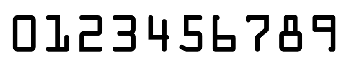

In [4]:
# Load the reference OCR-A image from disk, convert it to grayscale,
# and threshold it, such that the digits appear as *white* on a *black* background
# and invert it, such that the digits appear as *white* on a *black*
ref = cv2.imread("images/ocr_a_reference.png")
plt.figure()
plt.axis("off")
plt.imshow(ref)

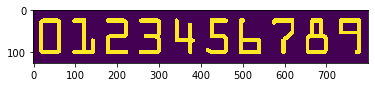

In [5]:
#cvtColor() method is used to convert an image from one color space to another
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)                   # (images , flag  that determines type of conversion)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(ref)

In [6]:
# Find contours in the OCR-A image (i.e,. the outlines of the digits)
# Sort them from left to right, and initialize a dictionary to map
# Digit name to the ROI
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
refCnts = refCnts[1] if imutils.is_cv3() else refCnts[0]
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]

In [7]:
digits = {}

In [8]:
# loop over the OCR-A reference contours
for (i, c) in enumerate(refCnts):
    # compute the bounding box for the digit, extract it, and resize
    # it to a fixed size
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:(y + h), x:(x + w)]
    roi2 = cv2.resize(roi, (57, 88))
 
    # update the digits dictionary, mapping the digit name to the ROI
    digits[i] = roi

In [9]:
# Saves the image in form of array
print(digits[1].shape)
print()
print(digits[4])

(85, 53)

[[  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


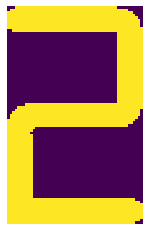

In [10]:
plt.figure()
plt.axis("off")
plt.imshow(digits[2])

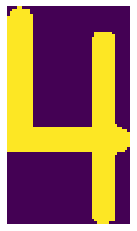

In [11]:
plt.figure()
plt.axis("off")
plt.imshow(digits[4])

In [12]:
# Initialize a rectangular (wider than it is tall) and square
# structuring kernel
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

<h4><i>Finding the Number

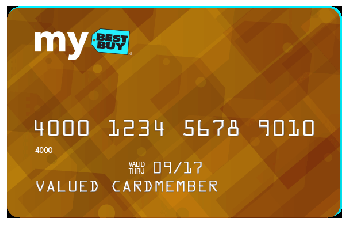

In [13]:
# Load the input image, resize it, and convert it to grayscale
image = cv2.imread("images/credit_card_01.png")
plt.figure()
plt.axis("off")
plt.imshow(image)

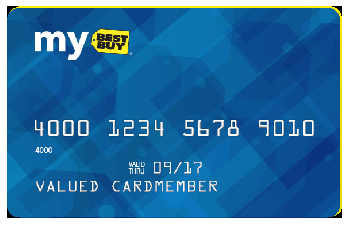

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.figure()
plt.axis("off")
plt.imshow(image)

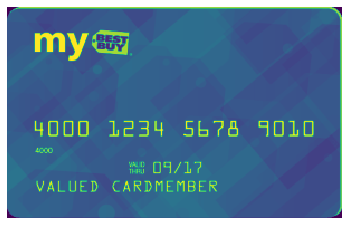

In [15]:
image = imutils.resize(image, width=300)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.axis("off")
plt.imshow(gray)

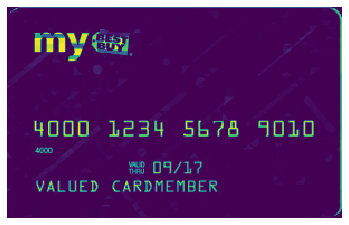

In [16]:
# apply a tophat (whitehat) morphological operator to find light
# regions against a dark background (i.e., the credit card numbers)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt.figure()
plt.axis("off")
plt.imshow(tophat)

In [17]:
# compute the Scharr gradient of the tophat image, then scale
# the rest back into the range [0, 255]
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

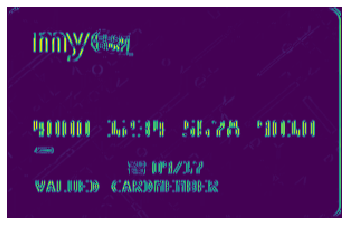

In [18]:
plt.figure()
plt.axis("off")
plt.imshow(gradX)

In [19]:
# apply a closing operation using the rectangular kernel to help
# cloes gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [20]:
# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

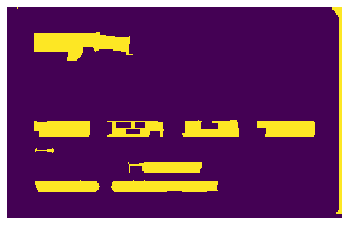

In [21]:
plt.figure()
plt.axis("off")
plt.imshow(thresh)

In [22]:
# find contours in the thresholded image, then initialize the
# list of digit locations
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[1] if imutils.is_cv3() else cnts[0]
# cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [23]:
locs = []

In [24]:
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the bounding box of the contour, then use the
    # bounding box coordinates to derive the aspect ratio
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
 
    # since credit cards used a fixed size fonts with 4 groups
    # of 4 digits, we can prune potential contours based on the
    # aspect ratio
    if ar > 2.5 and ar < 4.5:
        # contours can further be pruned on minimum/maximum width
        # and height
        if (w > 40 and w < 70) and (h > 10 and h < 20):
            # append the bounding box region of the digits group
            # to our locations list
            locs.append((x, y, w, h))

In [25]:
# sort the digit locations from left-to-right, then initialize the
# list of classified digits
locs = sorted(locs, key=lambda x:x[0])

In [26]:
locs

[(24, 102, 50, 14), (90, 102, 51, 14), (157, 101, 51, 15), (224, 102, 52, 14)]

In [27]:
output = []

In [28]:
# loop over the 4 groupings of 4 digits
for (i, (gX, gY, gW, gH)) in enumerate(locs):
    # initialize the list of group digits
    groupOutput = []
 
    # extract the group ROI of 4 digits from the grayscale image,
    # then apply thresholding to segment the digits from the
    # background of the credit card
    group = gray[gY - 5:gY + gH + 5, gX - 5:gX + gW + 5]
    group = cv2.threshold(group, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
    # detect the contours of each individual digit in the group,
    # then sort the digit contours from left to right
    digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    
    digitCnts = digitCnts[1] if imutils.is_cv3() else digitCnts[0]
    # digitCnts = digitCnts[0] if imutils.is_cv2() else digitCnts[1]
    digitCnts = contours.sort_contours(digitCnts,
    method="left-to-right")[0]

    # loop over the digit contours
    for c in digitCnts:
        # compute the bounding box of the individual digit, extract
        # the digit, and resize it to have the same fixed size as
        # the reference OCR-A images
        (x, y, w, h) = cv2.boundingRect(c)
        roi = group[y:y + h, x:x + w]
        roi = cv2.resize(roi, (57, 88))
 
        # initialize a list of template matching scores	
        scores = []
 
        # loop over the reference digit name and digit ROI
        for (digit, digitROI) in digits.items():
            # apply correlation-based template matching, take the
            # score, and update the scores list
            result = cv2.matchTemplate(roi, digitROI,
                                       cv2.TM_CCOEFF)
            (_, score, _, _) = cv2.minMaxLoc(result)
            scores.append(score)
 
        # the classification for the digit ROI will be the reference
        # digit name with the *largest* template matching score
        groupOutput.append(str(np.argmax(scores)))
        # draw the digit classifications around the group
        cv2.rectangle(image, (gX - 5, gY - 5),
                      (gX + gW + 5, gY + gH + 5), (0, 0, 255), 2)
        cv2.putText(image, "".join(groupOutput), (gX, gY - 15),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2)
 
    # update the output digits list
    output.extend(groupOutput)

In [29]:
# display the output credit card information to the screen
print("Credit Card Type: {}".format(FIRST_NUMBER[output[0]]))

Credit Card Type: Visa


In [30]:
print("Credit Card #: {}".format("".join(output)))

Credit Card #: 4000123456789010


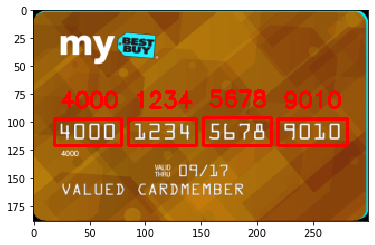

In [31]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

<h4><i>Creating the Template

<p style="text-indent:5em">We have tried to combine all of the above code and prepared a method find_number that returns the card type and the card number.The method can be found in ocr_card_number.py

#### Test-2

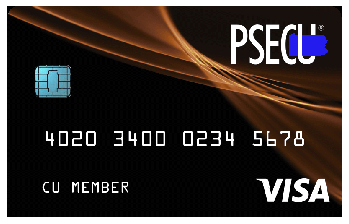

In [32]:
# Load the input image
image2 = cv2.imread("images/credit_card_02.png")
plt.figure()
plt.axis("off")
plt.imshow(image2)

In [33]:
from ocr_card_number import *

In [34]:
find_number(image2)

Credit Card Type: Visa
Credit Card #: 4020340002345678


#### Test-3

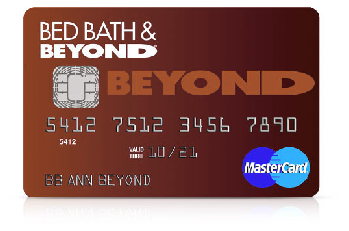

In [35]:
# Load the input image
image3 = cv2.imread("images/credit_card_03.png")
plt.figure()
plt.axis("off")
plt.imshow(image3)

In [36]:
find_number(image3)

Credit Card Type: MasterCard
Credit Card #: 5412751234567890


#### Test-4

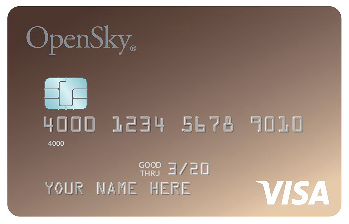

In [37]:
# Load the input image
image4 = cv2.imread("images/credit_card_04.png")
plt.figure()
plt.axis("off")
plt.imshow(image4)

In [38]:
find_number(image4)

Credit Card Type: Visa
Credit Card #: 4000123456789010


#### Test-5

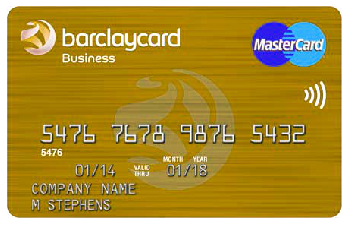

In [39]:
# Load the input image
image5 = cv2.imread("images/credit_card_05.png")
plt.figure()
plt.axis("off")
plt.imshow(image5)

In [40]:
find_number(image5)

Credit Card Type: MasterCard
Credit Card #: 5476767898765432


<center><h2><u>Conclusion</u><h2></center>
<ul>
    <li>We obtained 100% accuracy provided that we are provided with the card front image.</li>
    <br>
<li>To extend this application, you would want to gather real images of credit cards in the wild and potentially train a machine learning model (either via standard feature extraction or training or Convolutional Neural Network) to further improve the accuracy of this system.</li>